# Hacktiv8 PTP Introduction to Data Science Projects 3: Classification. Bank Marketing Dataset

Last Updated: December 20, 2021 <br>
Author: Winny Claudia Anggreacia

#### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

In [193]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import sklearn.linear_model as linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

In [142]:
df_bank_add_full=pd.read_csv('dataset/bank-additional-full.csv', delimiter=';')
df_bank_add=pd.read_csv('dataset/bank-additional.csv',delimiter=';')
df_bank_full=pd.read_csv('dataset/bank-full.csv', delimiter=';')

print('Data berhasil terbaca')

Data berhasil terbaca


In [143]:
df_bank_add_full.head()
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [144]:
df_bank_add.head()
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [145]:
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [146]:
#df_bank_add_full=df_bank_add_full.drop(columns=['duration'])
df_bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [147]:
df_bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [148]:
df_bank_add=df_bank_add.drop(columns=['duration'])
df_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [149]:
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [150]:
kolom_boolean = ['y']
kolom_kategori = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
kolom_numeric = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [151]:
kolom_lengkap = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

### Label Encoding

In [152]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

#### mengubah binary data menjadi boolean, mengubah tipe data pada kolom kategori menjadi numeric, menghapus hasil yang tidak diketahui, mengassign nilai x dan y


In [153]:
for col in kolom_boolean:
    df_bank_add_full.loc[df_bank_add_full[col]=='no', col] = 0
    df_bank_add_full.loc[df_bank_add_full[col]=='yes', col] = 1

    df_bank_add.loc[df_bank_add[col]=='no', col] = 0
    df_bank_add.loc[df_bank_add[col]=='yes', col] = 1

In [154]:
for col in kolom_kategori:
    df_bank_add_full[col] = label_encoder.fit_transform(df_bank_add_full[col])
    df_bank_add[col] = label_encoder.fit_transform(df_bank_add[col])

In [155]:
df_bank_add_full = df_bank_add_full[df_bank_add_full[col].isin([0,1])]
df_bank_add = df_bank_add[df_bank_add[col].isin([0,1])]

In [156]:
x_bank_add_full = df_bank_add_full [columns_features].to_numpy()
x_add_full = x_bank_add_full 

y_bank_add_full = df_bank_add_full['y'].astype('int')
y_bank_add_full = y_bank_add_full.to_numpy()
y_add_full = y_bank_add_full

In [157]:
x_bank_add = df_bank_add[columns_features].to_numpy()
x_add = x_bank_add

y_bank_add = df_bank_add['y'].astype('int')
y_bank_add = y_bank_add.to_numpy()
y_add = y_bank_add

# Data Model

## Logistic Regression

In [158]:
logis_regres = linear_model.LogisticRegression()
logis_regres.fit(x_add_full,y_add_full)
y_prediction = logis_regres.predict(x_add)

C:\Users\winny\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
print('score regression is',logis_regres.score(x_add_full,y_add_full))

score regression is 0.9063418309682281


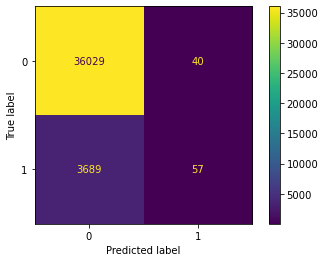

In [160]:
plot_confusion_matrix(logis_regres, x_add_full, y_add_full)

## K-Nearest Neighbors

In [161]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_add_full, y_add_full)
    pred_i = knn.predict(x_add)
    error.append(np.mean(pred_i != y_add))

In [162]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_add_full, y_add_full)
y_prediction = knn.predict(x_add)

Text(0, 0.5, 'Error mean')

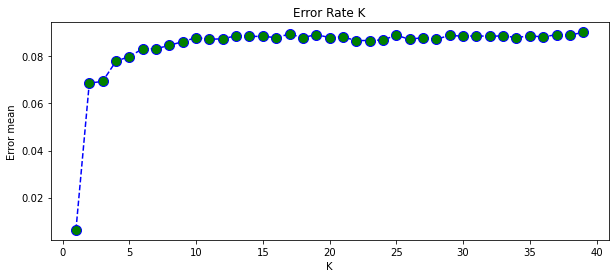

In [164]:
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [165]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_add_full, y_add_full)
y_predict = knn.predict(x_add)

In [176]:
print('score KNeighbors adalah ',knn.score(x_add_full, y_add_full))

score KNeighbors adalah  0.9182720080371719


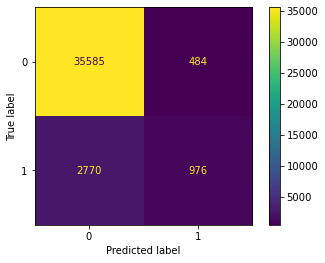

In [167]:
plot_confusion_matrix(knn, x_add_full, y_add_full)

## Support Vector Machine

In [168]:
svm = svm.SVC(kernel='linear')
svm.fit(x_add_full, y_add_full)
y_prediction = svm.predict(x_add)

In [175]:
print('score support vector machine adalah ',svm.score(x_add_full, y_add_full))

score support vector machine adalah  0.9046088157729499


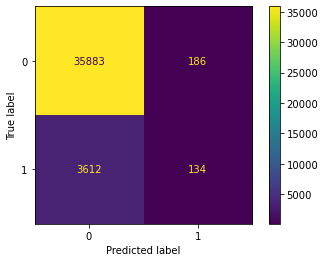

In [170]:
plot_confusion_matrix(svm,x_add_full, y_add_full)

## Decision Tree

In [173]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_add_full, y_add_full)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [178]:
tree = DecisionTreeClassifier(max_depth=1, criterion='gini')
tree.fit(x_add_full, y_add_full)
y_prediction = tree.predict(x_add)

In [179]:
print('score decision tree adalah',tree.score(x_add_full, y_add_full))

score decision tree adalah 0.9059148562099711


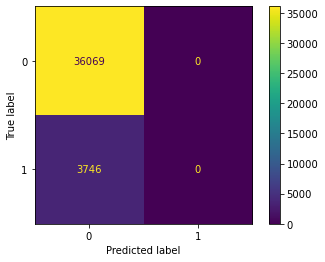

In [180]:
plot_confusion_matrix(tree, x_add_full, y_add_full)

## Random Forest

In [183]:
random_forest = RandomForestClassifier(max_depth=3, criterion='entropy')
random_forest.fit(x_add_full, y_add_full)
y_prediction = random_forest.predict(x_add)

In [184]:
print('score rdf is',random_forest.score(x_add_full, y_add_full))

score rdf is 0.9059148562099711


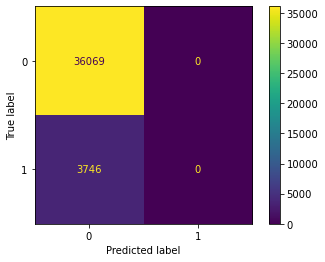

In [185]:
plot_confusion_matrix(tree, x_add_full, y_add_full)

## Naive Bayes

In [186]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_add_full, y_add_full)
y_prediction = naive_bayes.predict(x_add)

In [187]:
print('score naive bayes adalah ',naive_bayes.score(x_add_full, y_add_full))

score naive bayes adalah  0.8264975511741806


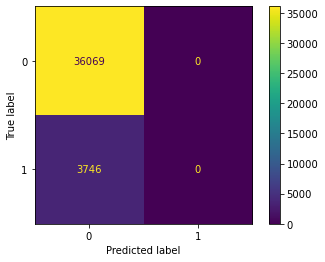

In [188]:
plot_confusion_matrix(tree, x_add_full, y_add_full)

## Confusion Matrix

In [189]:
list_model = [
    logis_regres,
    knn,
    svm,
    tree,
    random_forest,
    naive_bayes]

result = []
for mod in list_model:
    a = mod.fit(x_add_full, y_add_full)
    b = mod.score(x_add_full, y_add_full)
    c = mod.score(x_add, y_add)
    
    result.append(
        {
            mod: {
                'score_train': b,
                'score_test': c
            }
        })
    
result

C:\Users\winny\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[{LogisticRegression(): {'score_train': 0.9063418309682281,
   'score_test': 0.9097309529796329}},
 {KNeighborsClassifier(): {'score_train': 0.9182720080371719,
   'score_test': 0.9200402313301483}},
 {SVC(kernel='linear'): {'score_train': 0.9046088157729499,
   'score_test': 0.9069650490319336}},
 {DecisionTreeClassifier(max_depth=1): {'score_train': 0.9059148562099711,
   'score_test': 0.9097309529796329}},
 {RandomForestClassifier(criterion='entropy', max_depth=3): {'score_train': 0.9059148562099711,
   'score_test': 0.9097309529796329}},
 {GaussianNB(): {'score_train': 0.8264975511741806,
   'score_test': 0.8242393764143827}}]

### Insight

#### KNeighbors Classifier dapat dipilih karena memiliki skor tertinggi pada metode klasifikasi

#### Finish. Alhamdulillah selesai